In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
from pydantic import BaseModel
from typing import Optional

from sklearn.metrics import explained_variance_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


In [2]:
df = pd.read_csv("../figures/merged_validation.csv")
df.describe()

,Unnamed: 0,X,predicted_counts,prediction_prop,validation_counts,validation_prop
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,255.500000,5.500000,49.988235,0.100000,49.988235,0.100000
std,147.368586,2.875101,90.282594,0.174163,108.888186,0.196109
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,128.250000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,255.500000,5.500000,2.000000,0.004389,0.000000,0.000000
75%,382.750000,8.000000,55.750000,0.102684,57.375000,0.100000
max,510.000000,10.000000,589.000000,0.907550,856.800000,0.900000


In [3]:
df.head()

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site
0,1,1,Abiotic,0,0.000000,30.6,0.05,BisonGulch
1,2,2,Forb,290,0.473856,30.6,0.05,BisonGulch
2,3,3,Graminoid,48,0.078431,0.0,0.00,BisonGulch
3,4,4,Lichen,4,0.006536,30.6,0.05,BisonGulch
4,5,5,Moss,2,0.003268,30.6,0.05,BisonGulch


In [4]:
df["key"].unique()

array(['Abiotic', 'Forb', 'Graminoid', 'Lichen', 'Moss', 'ShrubDecid',
       'ShrubEvergreen', 'TreeBroadleaf', 'TreeConifer', 'Unknown'],
      dtype=object)

In [5]:
encoder = LabelEncoder()
df["site_code"] = encoder.fit_transform(df["site"])

In [6]:
df[["site","site_code"]].value_counts()

site         site_code
Chatanika    1            110
EightMile    2            110
MurphyDome   3            110
BisonGulch   0             90
twelveMile1  4             50
twelveMile2  5             40
dtype: int64

In [7]:
nodes = df["site_code"].unique()
print(nodes)
print(len(nodes))

colors = ['red', 'blue', 'yellow', 'violet', 'cyan', 'cyan']

cmap = ListedColormap(colors, name="sites")

[0 1 2 3 4 5]
6


In [19]:
df.head(25)

,Unnamed: 0,X,key,predicted_counts,prediction_prop,validation_counts,validation_prop,site,site_code
0,1,1,Abiotic,0,0.000000,30.60,0.05,BisonGulch,0
1,2,2,Forb,290,0.473856,30.60,0.05,BisonGulch,0
2,3,3,Graminoid,48,0.078431,0.00,0.00,BisonGulch,0
3,4,4,Lichen,4,0.006536,30.60,0.05,BisonGulch,0
4,5,5,Moss,2,0.003268,30.60,0.05,BisonGulch,0
5,6,6,ShrubDecid,31,0.050654,367.20,0.60,BisonGulch,0
6,7,7,ShrubEvergreen,3,0.004902,61.20,0.10,BisonGulch,0
7,8,8,TreeBroadleaf,0,0.000000,0.00,0.00,BisonGulch,0
8,9,9,TreeConifer,234,0.382353,61.20,0.10,BisonGulch,0
9,10,10,Unknown,0,0.000000,0.00,0.00,BisonGulch,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


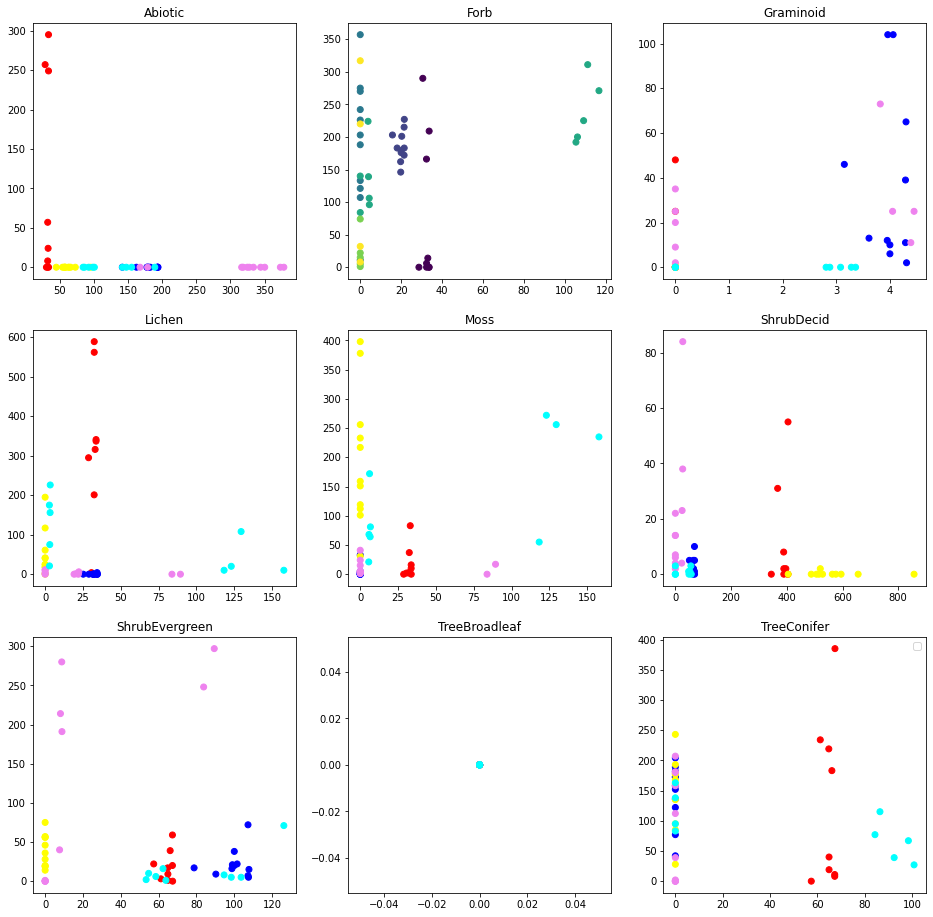

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,16))


ax[0][0].scatter(
    df[df["key"]=="Abiotic"]["validation_counts"], 
    df[df["key"]=="Abiotic"]["predicted_counts"],
    c=df[df["key"]=="Abiotic"]["site_code"],
    cmap=cmap)
ax[0][0].set_title("Abiotic")

ax[0][1].scatter(
    df[df["key"]=="Forb"]["validation_counts"], 
    df[df["key"]=="Forb"]["predicted_counts"],
    c=df[df["key"]=="Forb"]["site_code"])
ax[0][1].set_title("Forb")

ax[0][2].scatter(
    df[df["key"]=="Graminoid"]["validation_counts"], 
    df[df["key"]=="Graminoid"]["predicted_counts"],
    c=df[df["key"]=="Graminoid"]["site_code"],
    cmap = cmap)
ax[0][2].set_title("Graminoid")

ax[1][0].scatter(
    df[df["key"]=="Lichen"]["validation_counts"], 
    df[df["key"]=="Lichen"]["predicted_counts"],
    c=df[df["key"]=="Lichen"]["site_code"],
    cmap = cmap)
ax[1][0].set_title("Lichen")

ax[1][1].scatter(
    df[df["key"]=="Moss"]["validation_counts"], 
    df[df["key"]=="Moss"]["predicted_counts"],
    c=df[df["key"]=="Moss"]["site_code"],
    cmap = cmap)
ax[1][1].set_title("Moss")

ax[1][2].scatter(
    df[df["key"]=="ShrubDecid"]["validation_counts"], 
    df[df["key"]=="ShrubDecid"]["predicted_counts"],
    c=df[df["key"]=="ShrubDecid"]["site_code"],
    cmap = cmap)
ax[1][2].set_title("ShrubDecid")

ax[2][0].scatter(
    df[df["key"]=="ShrubEvergreen"]["validation_counts"], 
    df[df["key"]=="ShrubEvergreen"]["predicted_counts"],
    c=df[df["key"]=="ShrubEvergreen"]["site_code"],
    cmap = cmap)
ax[2][0].set_title("ShrubEvergreen")

ax[2][1].scatter(
    df[df["key"]=="TreeBroadleaf"]["validation_counts"], 
    df[df["key"]=="TreeBroadleaf"]["predicted_counts"],
    c=df[df["key"]=="TreeBroadleaf"]["site_code"],
    cmap = cmap)
ax[2][1].set_title("TreeBroadleaf")

ax[2][2].scatter(
    df[df["key"]=="TreeConifer"]["validation_counts"], 
    df[df["key"]=="TreeConifer"]["predicted_counts"],
    c=df[df["key"]=="TreeConifer"]["site_code"],
    cmap = cmap)
ax[2][2].set_title("TreeConifer")

plt.legend(
    
)

plt.show()


In [26]:
class ValidationResult(BaseModel):
    r2: float
    explained_variance: float
    intercept: float
    slope: float

    

In [27]:
def get_validation_stats(true: pd.Series, pred: pd.Series) -> ValidationResult:
    model = LinearRegression()
    model.fit(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    score = model.score(pred.values.reshape(-1,1), true.values.reshape(-1,1))
    explained_variance = explained_variance_score(true.values.reshape(-1,1), pred.values.reshape(-1,1))
    return ValidationResult(
        r2 = score, 
        explained_variance = explained_variance, 
        intercept = model.intercept_,
        slope = model.coef_
    )

def pretty_print_results(result: ValidationResult, header: Optional[str] = None) -> None:
    indent = ""
    if(header is not None):
        print(header)
        indent = "\t"
    print(f"{indent}R-squared:\t\t{result.r2}")
    print(f"{indent}Explained Variance:\t{result.explained_variance}")
    print(f"{indent}Intercept:\t\t{result.intercept}")
    print(f"{indent}Slope:\t\t\t{result.slope}")


In [28]:
result = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

In [29]:
pretty_print_results(result, "Test")

Test
	R-squared:		0.09266539207187041
	Explained Variance:	-0.37891765685649537
	Intercept:		0.35801528427074325
	Slope:			-0.7962402078215367


In [30]:
abiotic = get_validation_stats(df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

forb = get_validation_stats( 
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"])

graminoid = get_validation_stats(
    df[df["key"]=="Graminoid"]["validation_prop"], 
    df[df["key"]=="Graminoid"]["prediction_prop"],
)

lichen = get_validation_stats(
    df[df["key"]=="Lichen"]["validation_prop"], 
    df[df["key"]=="Lichen"]["prediction_prop"]
)

moss = get_validation_stats(
    df[df["key"]=="Moss"]["validation_prop"], 
    df[df["key"]=="Moss"]["prediction_prop"],
)

shrub_decid = get_validation_stats(
    df[df["key"]=="ShrubDecid"]["validation_prop"], 
    df[df["key"]=="ShrubDecid"]["prediction_prop"]
)

shrub_evergreen = get_validation_stats(
    df[df["key"]=="ShrubEvergreen"]["validation_prop"], 
    df[df["key"]=="ShrubEvergreen"]["prediction_prop"]
)

tree_broadleaf = get_validation_stats(
    df[df["key"]=="TreeBroadleaf"]["validation_prop"], 
    df[df["key"]=="TreeBroadleaf"]["prediction_prop"]
)

tree_conifer = get_validation_stats(
    df[df["key"]=="TreeConifer"]["validation_prop"], 
    df[df["key"]=="TreeConifer"]["prediction_prop"]
)

In [31]:
pretty_print_results(abiotic, "Abiotic:")
pretty_print_results(forb, "Forb:")
pretty_print_results(graminoid, "Graminoid:")
pretty_print_results(lichen, "Lichen:")
pretty_print_results(moss, "Moss:")
pretty_print_results(shrub_decid, "Deciduous Shrubs:")
pretty_print_results(shrub_evergreen, "Evergreen Shrub")
pretty_print_results(tree_broadleaf, "Broadleaf Tree")
pretty_print_results(tree_conifer, "Coniferous Tree")

Abiotic:
	R-squared:		0.09266539207187041
	Explained Variance:	-0.37891765685649537
	Intercept:		0.35801528427074325
	Slope:			-0.7962402078215367
Forb:
	R-squared:		0.1464029919194899
	Explained Variance:	-6.369951661473444
	Intercept:		0.004284932614173183
	Slope:			0.13035158842409542
Graminoid:
	R-squared:		0.2090776119412282
	Explained Variance:	-151.01878720995035
	Intercept:		0.002723077631569597
	Slope:			0.03584946683131908
Lichen:
	R-squared:		0.023565112185588655
	Explained Variance:	-12.282987122454012
	Intercept:		0.06506445197711028
	Slope:			-0.045761384699748456
Moss:
	R-squared:		0.06745784395373777
	Explained Variance:	-4.273238176094346
	Intercept:		0.02351843514356521
	Slope:			0.11084452545164078
Deciduous Shrubs:
	R-squared:		0.06375661050801895
	Explained Variance:	-0.05435655984968957
	Intercept:		0.39735229289041496
	Slope:			-2.76939964481804
Evergreen Shrub
	R-squared:		0.00178370540570838
	Explained Variance:	-2.748755199328776
	Intercept:		0.117733389167097

In [15]:
abiotic_evs = explained_variance_score( 
    df[df["key"]=="Abiotic"]["validation_prop"], 
    df[df["key"]=="Abiotic"]["prediction_prop"])

abiotic_model = LinearRegression(fit_intercept = True)
abiotic_model.fit(
    df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

print(abiotic_model.get_params())

abiotic_r2 = abiotic_model.score(df[df["key"]=="Abiotic"]["prediction_prop"].values.reshape(-1,1),
    df[df["key"]=="Abiotic"]["validation_prop"].values.reshape(-1,1))

forb_r2 = explained_variance_score(
    df[df["key"]=="Forb"]["validation_prop"], 
    df[df["key"]=="Forb"]["prediction_prop"]
)

print("Explained Variance by PFT")
print("Abiotic:")
print(f"\tExplained Variance:\t{abiotic_evs}")
print(f"\tR-Squared:\t\t{abiotic_r2}")
print(f"Forb: \t\t\t{forb_r2}")

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Explained Variance by PFT
Abiotic:
	Explained Variance:	-0.37891765685649537
	R-Squared:		0.09266539207187041
Forb: 			-6.369951661473444


site         site_code
MurphyDome   3            120
Chatanika    1            110
EightMile    2            110
BisonGulch   0             90
twelveMile1  4             50
twelveMile2  5             40


In [16]:
bison_gulch = get_validation_stats(
    df[df["site_code"] == 0]["validation_prop"],
    df[df["site_code"] == 0]["prediction_prop"]

)

pretty_print_results(bison_gulch, "Bison Gulch:")

chatanika = get_validation_stats(
    df[df["site_code"] == 1]["validation_prop"],
    df[df["site_code"] == 1]["prediction_prop"]

)

eight_mile = get_validation_stats(
    df[df["site_code"] == 2]["validation_prop"],
    df[df["site_code"] == 2]["prediction_prop"]

)
murphy_dome = get_validation_stats(
    df[df["site_code"] == 3]["validation_prop"],
    df[df["site_code"] == 3]["prediction_prop"]

)

twelve_mile_1 = get_validation_stats(
    df[df["site_code"] == 4]["validation_prop"],
    df[df["site_code"] == 4]["prediction_prop"]

)

twelve_mile_2 = get_validation_stats(
    df[df["site_code"] == 5]["validation_prop"],
    df[df["site_code"] == 5]["prediction_prop"]
)

pretty_print_results(chatanika, "Chatanika")
pretty_print_results(eight_mile, "Eight Mile")
pretty_print_results(murphy_dome, "Murphy Dome")
pretty_print_results(twelve_mile_1, "Twelve Mile (1)")
pretty_print_results(twelve_mile_2, "Twelve Mile (2)")



Bison Gulch:
	R-squared:		0.008512082791208075
	Explained Variance:	-1.5195261468309411
	Intercept:		0.10806563208304049
	Slope:			-0.08065632083040473
Chatanika
	R-squared:		0.06287789262828325
	Explained Variance:	-2.070461646687395
	Intercept:		0.12072624861896855
	Slope:			-0.20726248618968546
Eight Mile
	R-squared:		0.061889541848639706
	Explained Variance:	-0.5869153665406446
	Intercept:		0.1446869825067869
	Slope:			-0.44686982506786893
Murphy Dome
	R-squared:		0.0003852441241282145
	Explained Variance:	-0.7063550438309514
	Intercept:		0.1023905507401331
	Slope:			-0.023905507401330794
Twelve Mile (1)
	R-squared:		0.009955292605493216
	Explained Variance:	-2.312434022435003
	Intercept:		0.107005956832546
	Slope:			-0.07005956832546002
Twelve Mile (2)
	R-squared:		0.010031714908328215
	Explained Variance:	-1.6126263641476104
	Intercept:		0.09271041806222252
	Slope:			0.0728958193777749
